# 1.Data Cleaning

In [139]:
%reload_ext autoreload
%autoreload 2
import os
import json
import numpy as np
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, pearsonr, ttest_ind, spearmanr
from scipy.interpolate import interp1d, PchipInterpolator
from glob import glob
from datetime import datetime
from IPython.display import clear_output
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from B_dataprocessing import *
from B_DNN_model import *
from B_plotting import *

## 1.1Raw Data

In [148]:
all_metrics_df,testParamDf = data_generation()

Unique DODs 18
Unique discharging_protocol 23
Unique charging_protocol 47
8
12
5


In [140]:
test_coef = ["0","2","3","4","exponential"]
func_coef = ["raw","second","third","forth","exponential"]
for i in range(0,2):
    globals()[f'X{test_coef[i]}'],globals()[f'y{test_coef[i]}'],globals()[f'Y{test_coef[i]}'],globals()[f'X_Y_merged{test_coef[i]}'] = \
        eval(func_coef[i]+"_order_poly_fitting(all_metrics_df,testParamDf)")

Optimization terminated successfully.
         Current function value: 0.569490
         Iterations: 174
         Function evaluations: 316
Optimization terminated successfully.
         Current function value: 3.238437
         Iterations: 166
         Function evaluations: 293
Optimization terminated successfully.
         Current function value: 4.532901
         Iterations: 153
         Function evaluations: 271
Optimization terminated successfully.
         Current function value: 3.550682
         Iterations: 159
         Function evaluations: 273
Optimization terminated successfully.
         Current function value: 0.523399
         Iterations: 126
         Function evaluations: 227
Optimization terminated successfully.
         Current function value: 0.596615
         Iterations: 126
         Function evaluations: 230
Optimization terminated successfully.
         Current function value: 1.334330
         Iterations: 142
         Function evaluations: 254
Optimization termina

/Users/yeyangzu/Documents/4. Career/Stanford/Courses/CS/CS230/Project/Git/Stanford_Battery_Project/Final_Project_Git_Code/B_dataprocessing.py:74: RuntimeWarning: invalid value encountered in double_scalars
  rms_pow2 = lambda beta, x, y: np.sqrt(np.sum(np.square((f_pow2(beta,x)-y))) / len(y)) * 100 * len(y) / np.sum(y)



Optimization terminated successfully.
         Current function value: 3.415557
         Iterations: 38
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.246889
         Iterations: 82
         Function evaluations: 156
Optimization terminated successfully.
         Current function value: 1.387399
         Iterations: 78
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 0.156818
         Iterations: 106
         Function evaluations: 188
Optimization terminated successfully.
         Current function value: 0.191299
         Iterations: 123
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 1.073795
         Iterations: 113
         Function evaluations: 200
Optimization terminated successfully.
         Current function value: 0.266335
         Iterations: 131
         Function evaluations: 235
Optimization terminated

In [18]:
test_coef = ["0","2","3","4","exponential"]
func_coef = ["raw","second","third","forth","exponential"]
for i in range(len(test_coef)):
    globals()[f'X{test_coef[i]}'],globals()[f'y{test_coef[i]}'],globals()[f'Y{test_coef[i]}'],globals()[f'X_Y_merged{test_coef[i]}'] = \
        eval(func_coef[i]+"_order_poly_fitting(all_metrics_df,testParamDf)")

Optimization terminated successfully.
         Current function value: 0.569490
         Iterations: 174
         Function evaluations: 316
Optimization terminated successfully.
         Current function value: 3.238437
         Iterations: 166
         Function evaluations: 293
Optimization terminated successfully.
         Current function value: 4.532901
         Iterations: 153
         Function evaluations: 271
Optimization terminated successfully.
         Current function value: 3.550682
         Iterations: 159
         Function evaluations: 273
Optimization terminated successfully.
         Current function value: 0.523399
         Iterations: 126
         Function evaluations: 227
Optimization terminated successfully.
         Current function value: 0.596615
         Iterations: 126
         Function evaluations: 230
Optimization terminated successfully.
         Current function value: 1.334330
         Iterations: 142
         Function evaluations: 254
Optimization termina

/Users/yeyangzu/Documents/4. Career/Stanford/Courses/CS/CS230/Project/Git/Stanford_Battery_Project/Final_Project_Git_Code/B_dataprocessing.py:74: RuntimeWarning: invalid value encountered in double_scalars
  rms_pow2 = lambda beta, x, y: np.sqrt(np.sum(np.square((f_pow2(beta,x)-y))) / len(y)) * 100 * len(y) / np.sum(y)



Optimization terminated successfully.
         Current function value: 3.415557
         Iterations: 38
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.246889
         Iterations: 82
         Function evaluations: 156
Optimization terminated successfully.
         Current function value: 1.387399
         Iterations: 78
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 0.156818
         Iterations: 106
         Function evaluations: 188
Optimization terminated successfully.
         Current function value: 0.191299
         Iterations: 123
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 1.073795
         Iterations: 113
         Function evaluations: 200
Optimization terminated successfully.
         Current function value: 0.266335
         Iterations: 131
         Function evaluations: 235
Optimization terminated

KeyboardInterrupt: 

# Version


### Label Ouput Y with cell keys

In [143]:
version = '0'
X,y,Y,X_Y_merged = eval('X'+version),eval('y'+version),eval('Y'+version),eval('X_Y_merged'+version)
objective = eval('objective_'+version)
#key_parameters
y_matrix_key = np.array([k for k,v in Y.items()]).reshape(-1,1)
y_selected_key = y_matrix_key.squeeze()
#y with key column
y_with_key = np.append(y, y_matrix_key, axis = 1)

## 1.3 Y visualization -> Linear Scaling

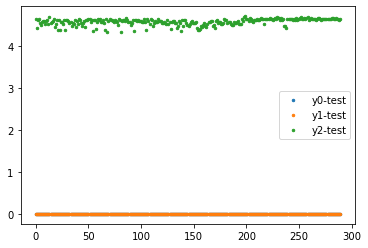

In [149]:
x_ax = range(len(X))
_,num_outputs = y.shape
for i in range(num_outputs):
    plt.scatter(x_ax, y[:,i],  s=6, label=f"y{i}-test")
plt.legend()
plt.show()

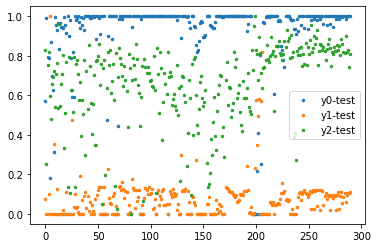

In [150]:
for i in range(num_outputs):
    plt.scatter(x_ax, (y[:,i]-min(y[:,i]))/(max(y[:,i])-min(y[:,i])),  s=6, label=f"y{i}-test")
plt.legend()

plt.legend()
plt.show()

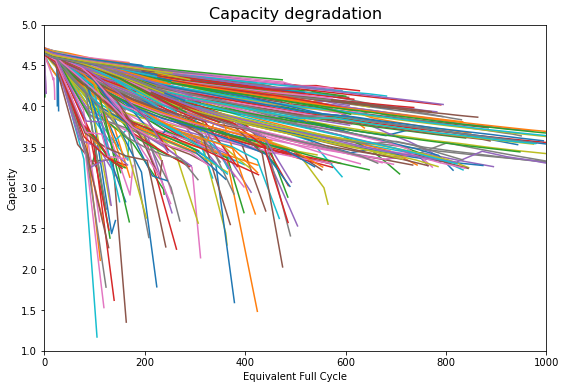

In [151]:
#empirical data
l=1000
d=1
plt.figure(figsize=(9,6))
plot_empirical(l,d,all_metrics_df)

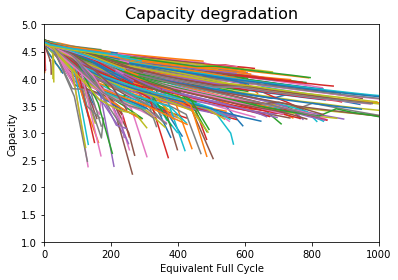

In [152]:
#selected empirical data
plot_empirical_selected(y_selected_key,l,d,all_metrics_df)

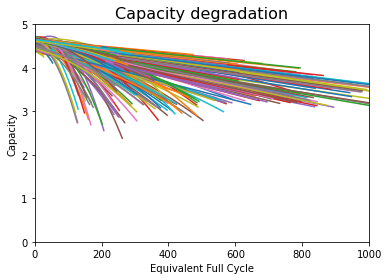

In [153]:
#selected fitting data
l = 1000
w = 0
plot_curve_pred(y_with_key,y_selected_key,l,w,all_metrics_df,objective)

## 1.4 Correlation Map

In [77]:
#correlation_heatmap(X_Y_merged,testParamDf)

# 2. Train the model

In [167]:
#full gamma
X_train,X_test,y_train_coef,y_test_coef,y_train,y_test,y_train_norm,y_test_norm=data_split(X,y_with_key)

#mae
model0 = sequential_model(50,30,'mae',X_train,y_train)
model0.summary()

4
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_31 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 93        
Total params: 2,173
Trainable params: 2,173
Non-trainable params: 0
_________________________________________________________________


# 3.Prediction

In [168]:
#no validation
lr_model_history_no_val = model0.fit(X_train, y_train_norm, 
                        epochs=100, 
                        verbose=0)

raw_y_pred = model0.predict(X_test)
y_pred = recover(raw_y_pred,y_train)
var_num = y_pred.shape[1]
for i in range(var_num):
    print(f"y{i}MSE:%.4f" % mean_squared_error(y_test[:,i], y_pred[:,i]))

2021-11-16 15:44:00.627512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


y0MSE:0.0000
y1MSE:0.0000
y2MSE:0.0031


2021-11-16 15:44:04.857083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


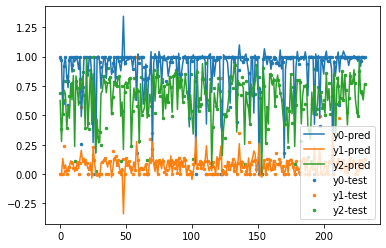

In [164]:
###train###
raw_y_pred = model0.predict(X_train)
y_pred = recover(raw_y_pred,y_train)
x_ax = range(len(X_train))
for i in range(var_num):
    plt.scatter(x_ax, y_train_norm[:,i],  s=6, label=f"y{i}-test")
    plt.plot(x_ax, raw_y_pred[:,i], label=f"y{i}-pred")
plt.legend()
plt.show()

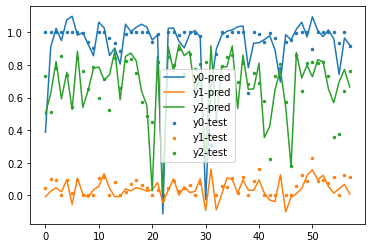

In [169]:
x_ax = range(len(X_test))
for i in range(var_num):
    plt.scatter(x_ax, y_test_norm[:,i],  s=6, label=f"y{i}-test")
    plt.plot(x_ax, raw_y_pred[:,i], label=f"y{i}-pred")
plt.legend()
plt.show()

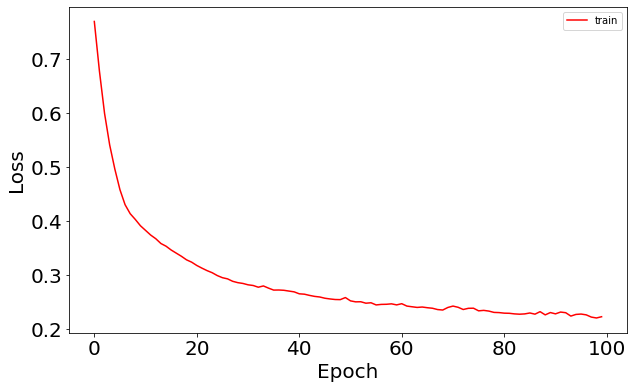

In [170]:
# Plot the loss function with no val
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history_no_val.history['loss']), 'r', label='train')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

## (DONT"t RUN UNLESS NEEDED) What if we add validation part?

In [ ]:
'''python
# Plot the loss function
lr_model_history = model0.fit(X_train, y_train_norm, 
                            epochs=100, 
                            verbose=0,
                            validation_data=(X_test, y_test_norm))

y_pred = model0.predict(X_test)*y_train.max(axis=0)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
'''

"python\n# Plot the loss function\nlr_model_history = model0.fit(X_train, y_train_norm, \n                            epochs=100, \n                            verbose=0,\n                            validation_data=(X_test, y_test_norm))\n\ny_pred = model0.predict(X_test)*y_train.max(axis=0)\n\nfig, ax = plt.subplots(1, 1, figsize=(10,6))\nax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')\nax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')\nax.set_xlabel(r'Epoch', fontsize=20)\nax.set_ylabel(r'Loss', fontsize=20)\nax.legend()\nax.tick_params(labelsize=20)\n"

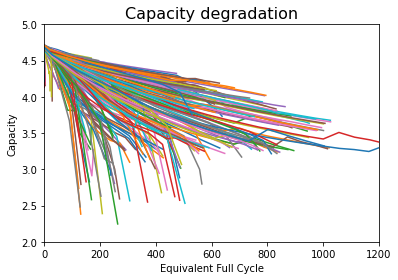

In [162]:
####Train####
test_key = y_train_coef[:,-1]
l = 1200
w = 2
plot_empirical_selected(test_key,l,w,all_metrics_df)
#真实

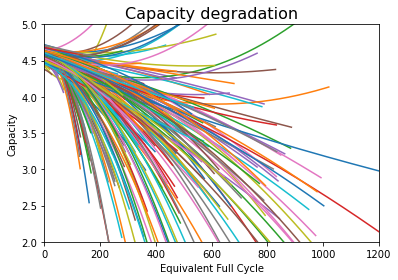

In [165]:
###train
y_with_key_test = np.append(y_pred, test_key.reshape(-1,1), axis = 1)
plot_curve_pred(y_with_key_test,test_key,l,w,all_metrics_df,objective)
#预测

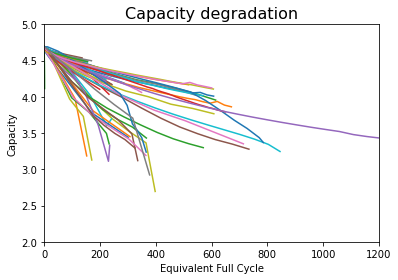

In [171]:
test_key = y_test_coef[:,-1]
l = 1200
w = 2
plot_empirical_selected(test_key,l,w,all_metrics_df)
#真实

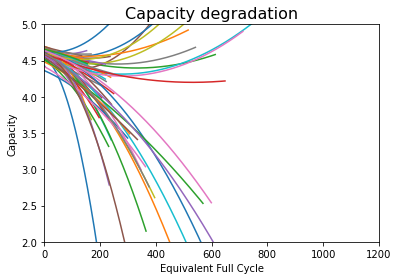

In [172]:
y_with_key_test = np.append(y_pred, test_key.reshape(-1,1), axis = 1)
plot_curve_pred(y_with_key_test,test_key,l,w,all_metrics_df,objective)
#预测

# Error Analysis

In [123]:
# all cell's RMSE $ MAE
RMS, MAE = pred_error(y_with_key_test,test_key,all_metrics_df,objective)
RMS, MAE
# overall RMSE & MAE
Rms=np.mean(np.array([rms for rms in RMS.values()]))
Mae=np.mean(np.array([mae for mae in MAE.values()]))
display(Rms,Mae)

0.48243176079896055

1.6509191540316341

In [138]:
n=349
select_cell = y_with_key[:,-1] == n
print(y_with_key[select_cell,:])
select_cell = y_with_key_test[:,-1] == n
print(y_with_key_test[select_cell,:])

[[ 6.63230436e-07 -1.53379127e-03  4.67238411e+00  3.49000000e+02]]
[[ 1.70397041e-06 -1.89903816e-03  4.67457074e+00  3.49000000e+02]]


/var/folders/_w/m21mbpwj00q_0ghj07dwvwj80000gn/T/ipykernel_66738/1556785822.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(key)


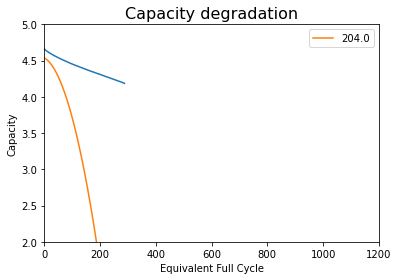

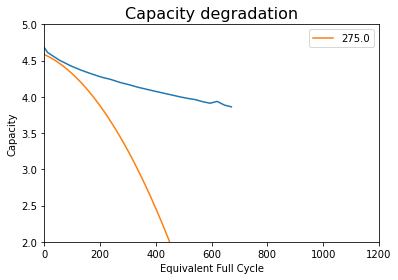

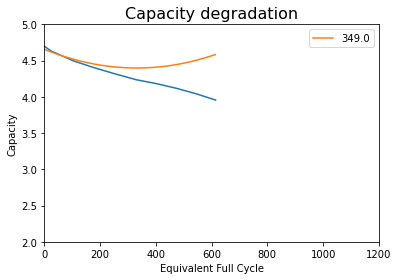

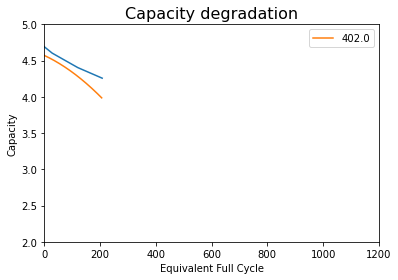

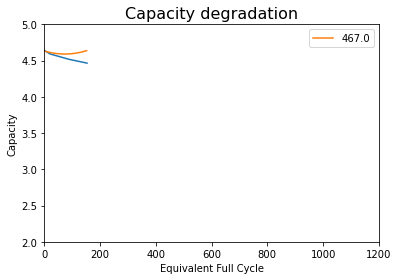

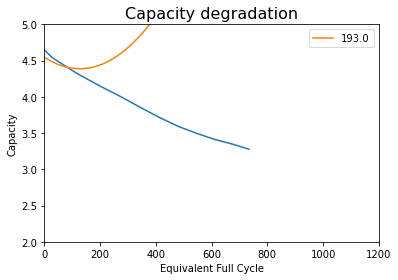

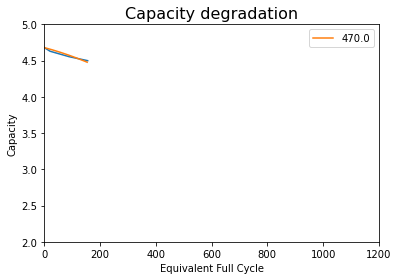

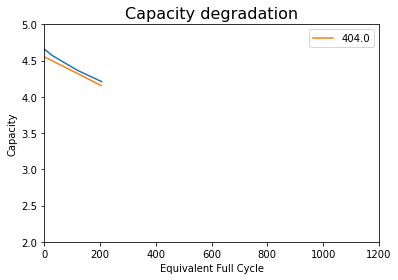

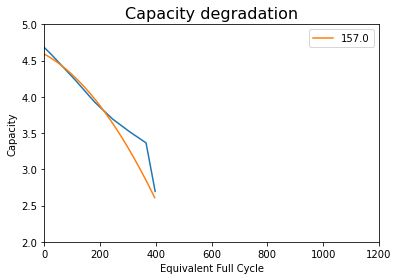

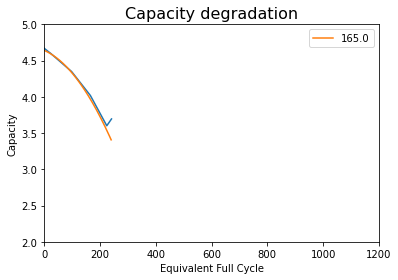

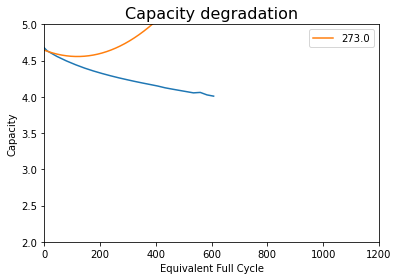

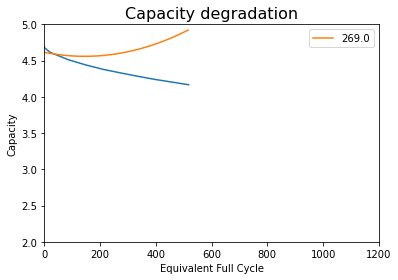

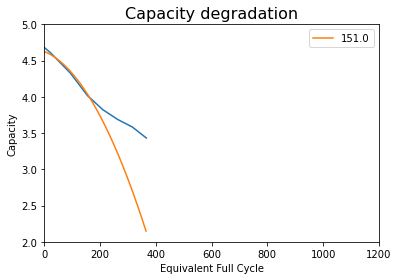

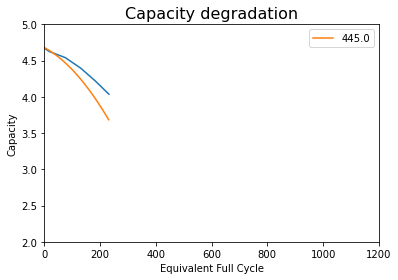

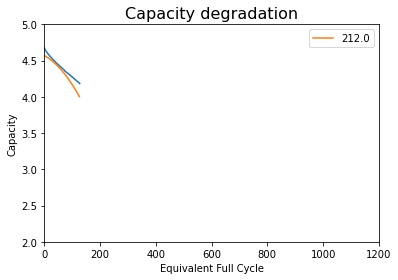

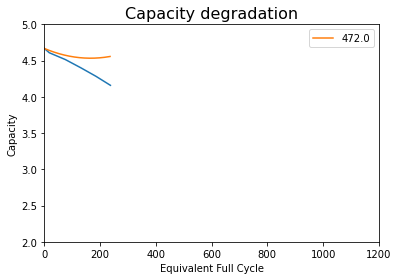

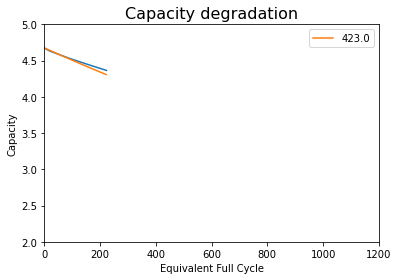

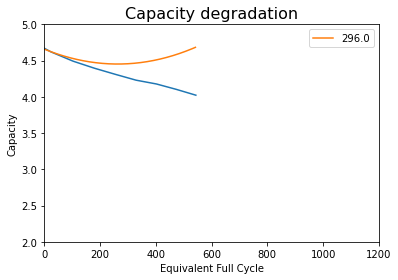

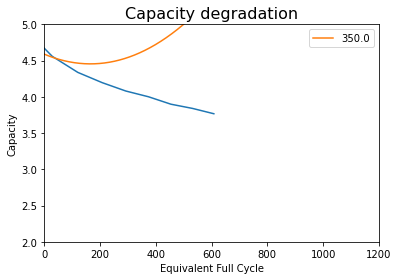

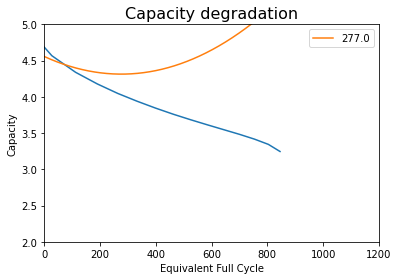

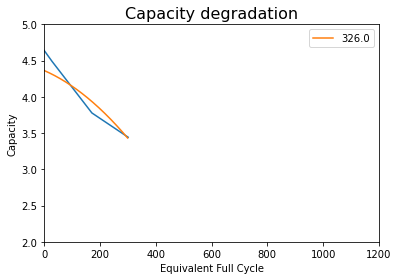

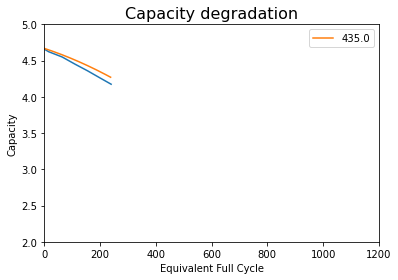

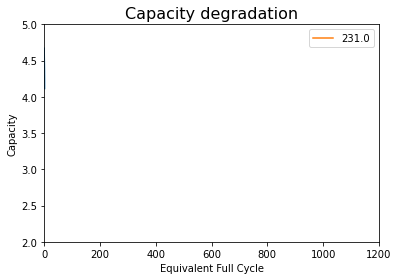

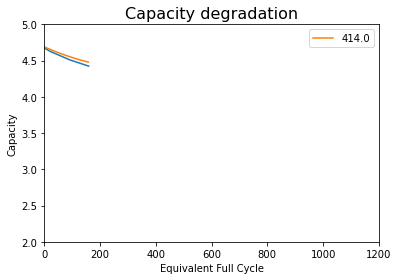

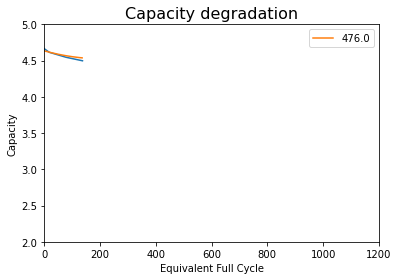

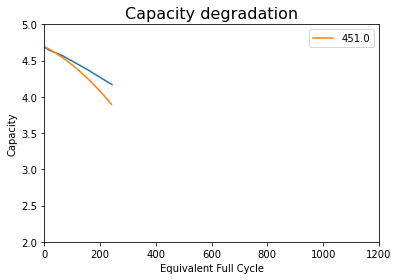

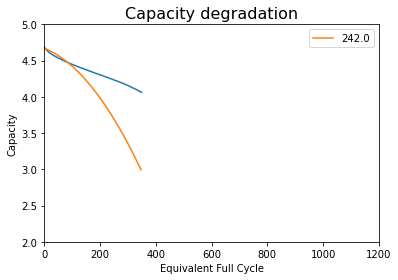

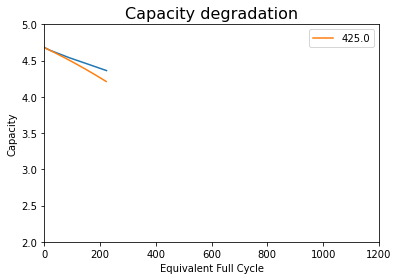

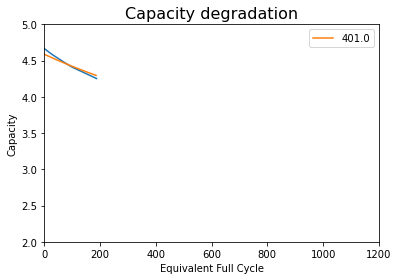

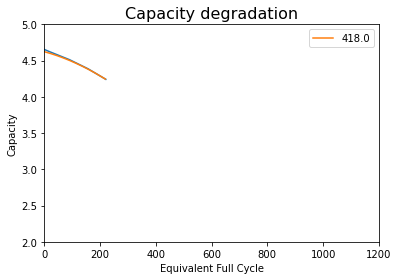

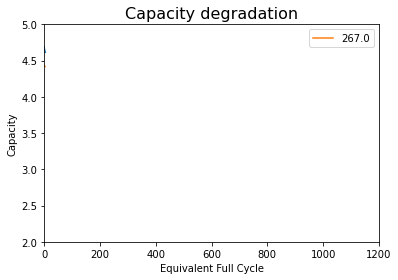

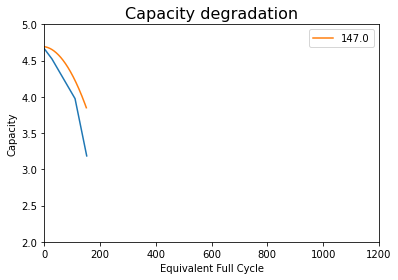

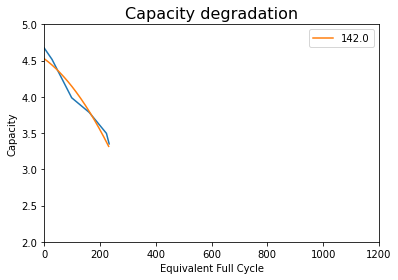

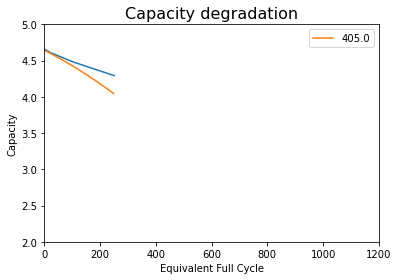

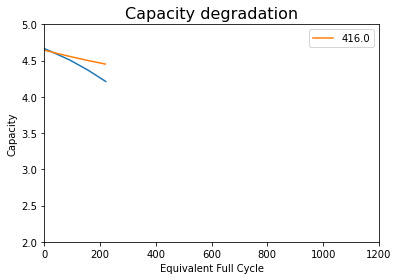

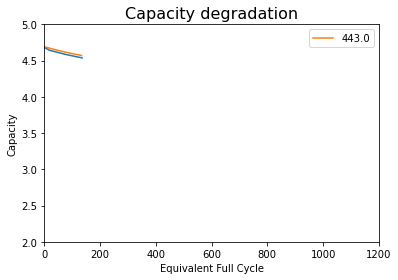

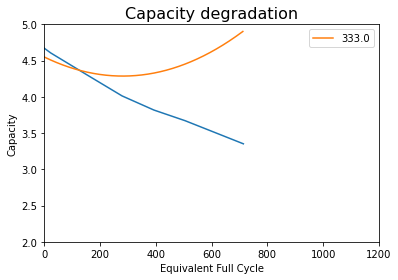

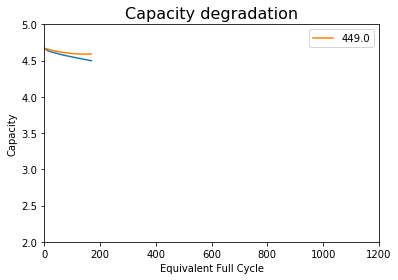

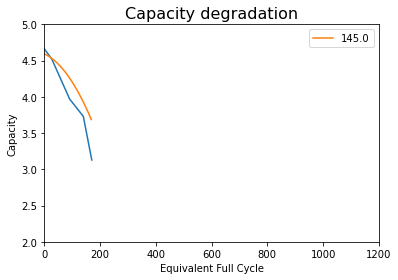

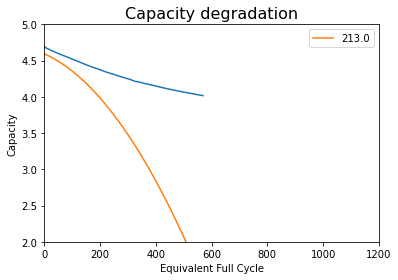

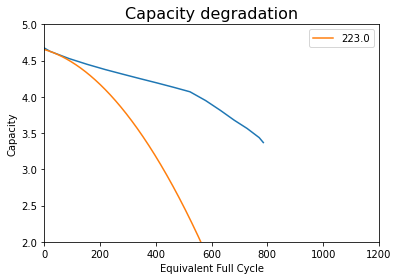

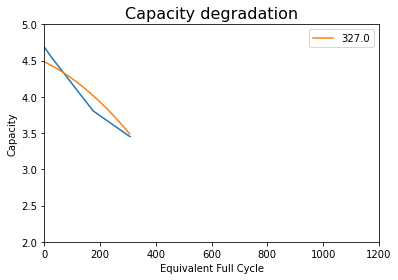

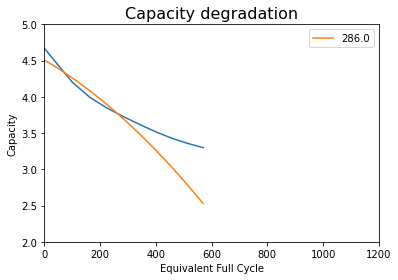

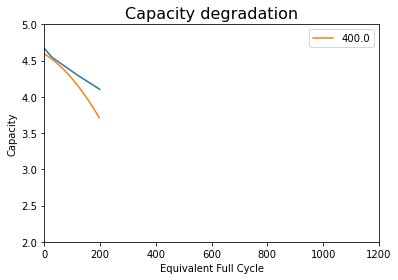

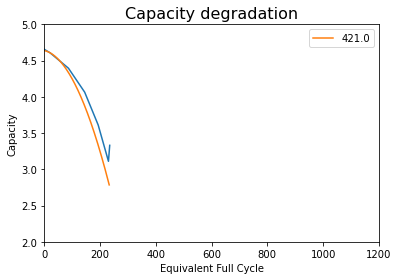

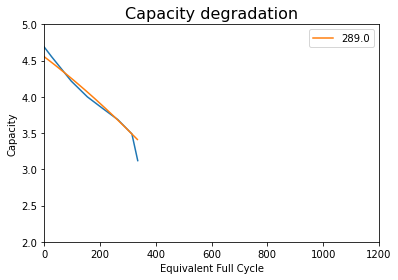

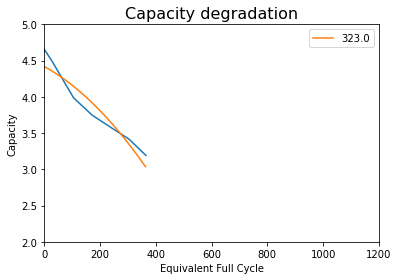

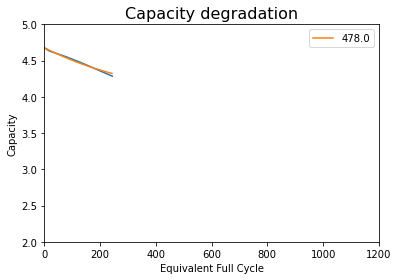

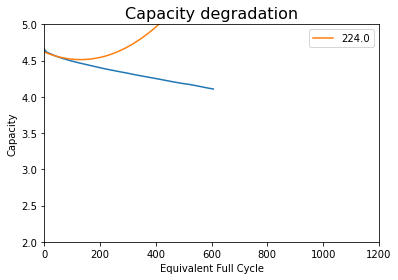

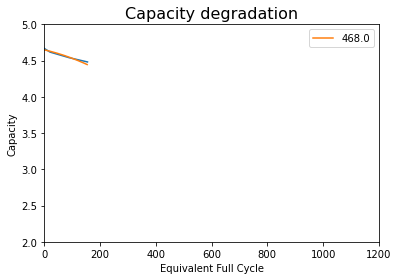

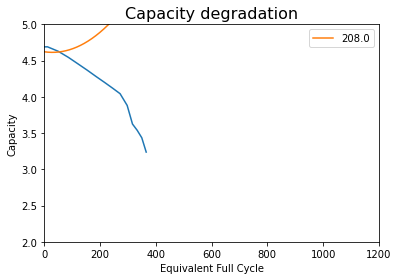

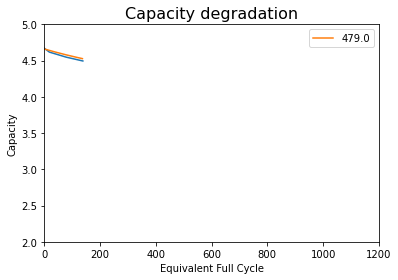

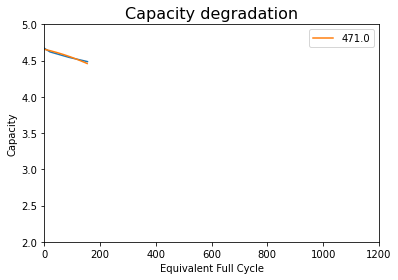

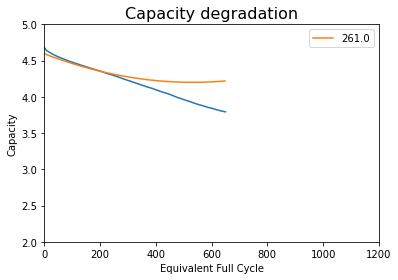

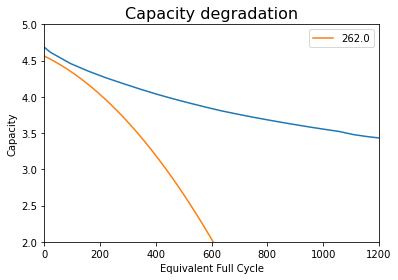

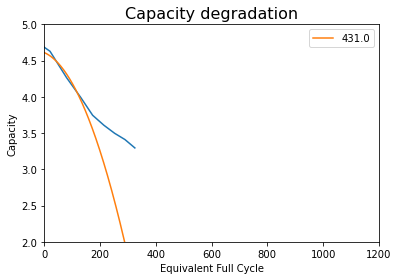

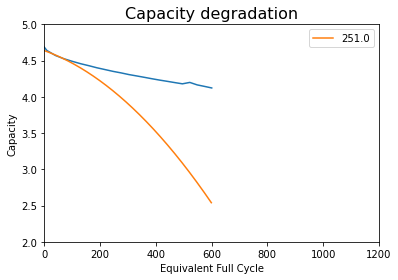

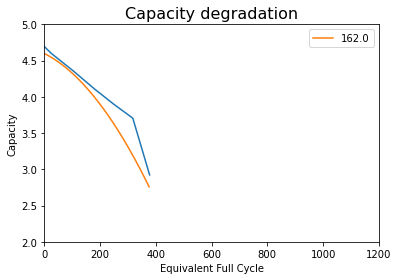

In [173]:
#Predicted Model
for key in test_key:
    inputk = np.array([key])
    plt.figure(key)
    plot_empirical_selected(inputk,l,d,all_metrics_df)
    plot_curve_pred(y_with_key_test,inputk,l,w,all_metrics_df,objective)


/var/folders/_w/m21mbpwj00q_0ghj07dwvwj80000gn/T/ipykernel_58710/2724505573.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(key)


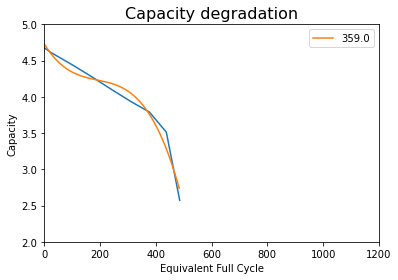

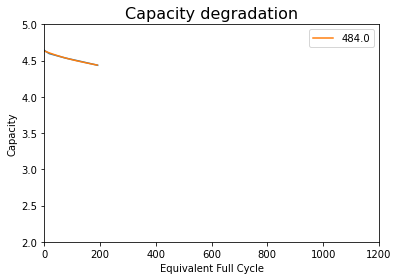

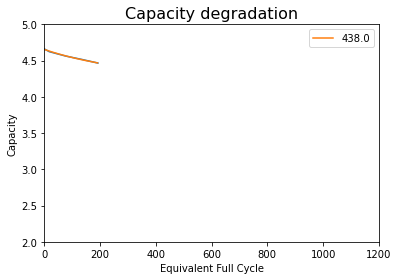

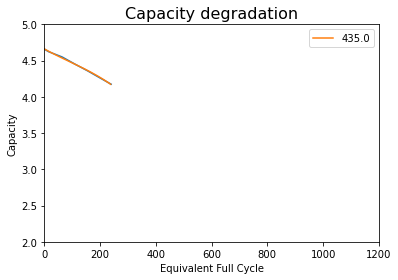

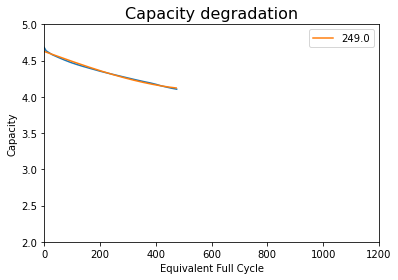

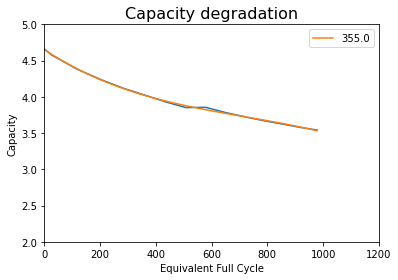

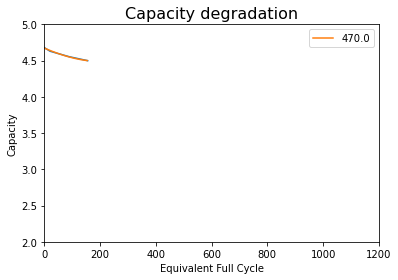

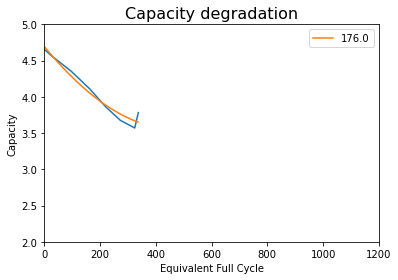

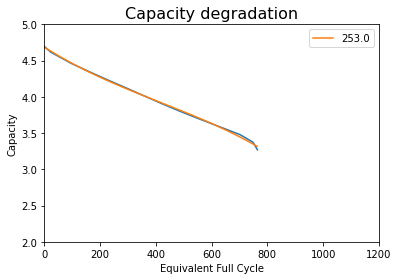

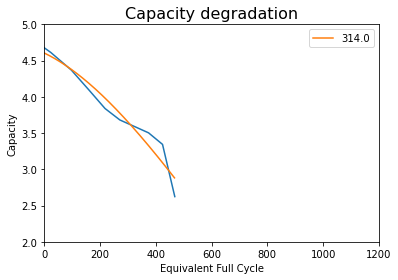

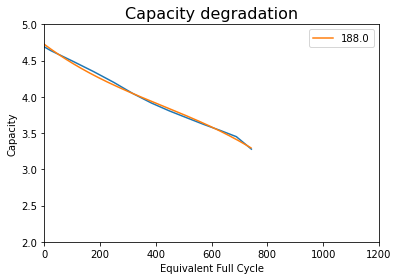

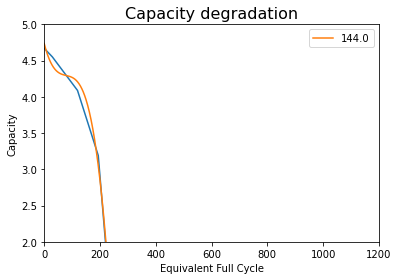

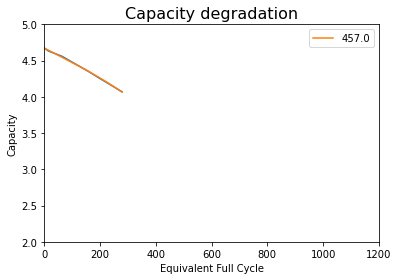

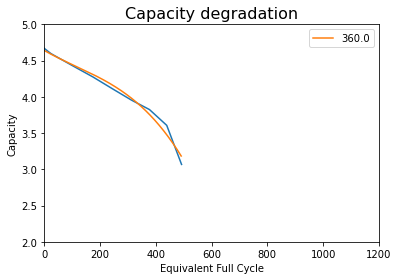

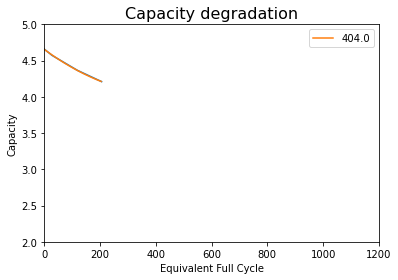

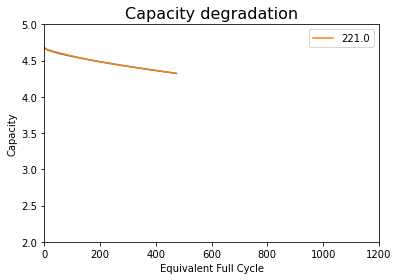

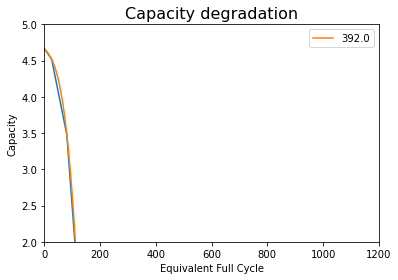

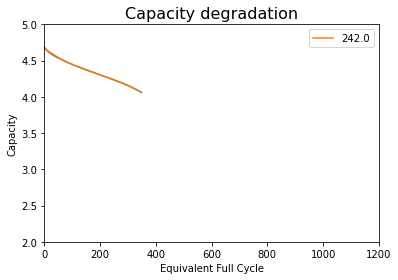

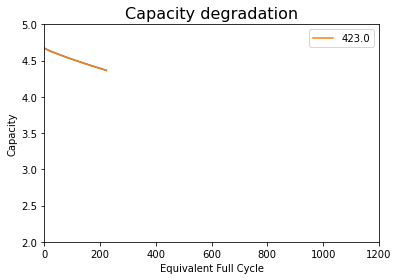

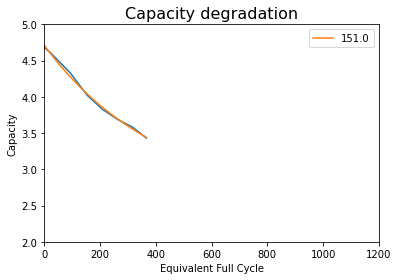

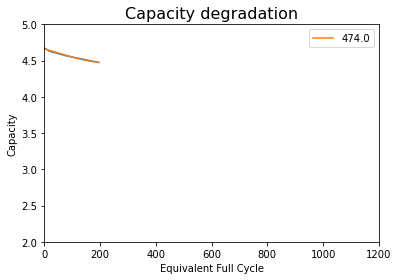

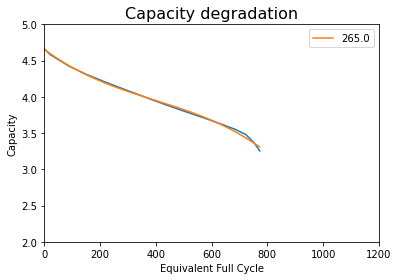

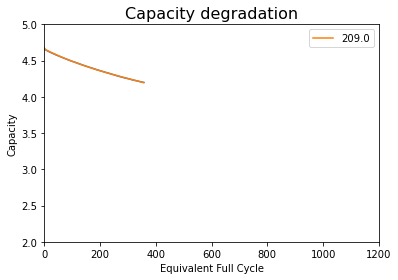

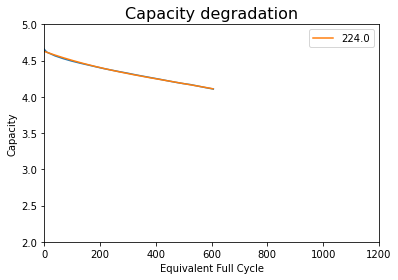

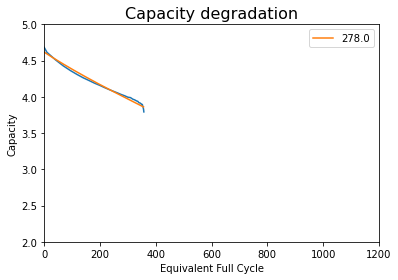

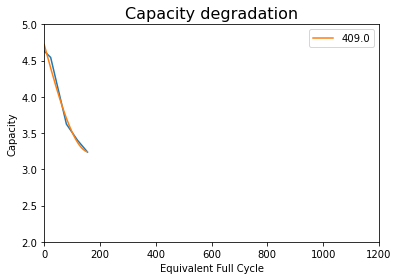

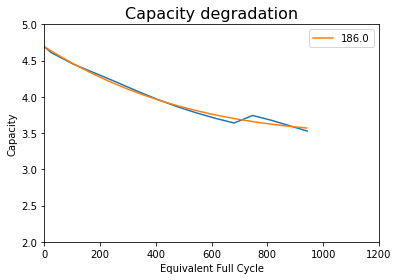

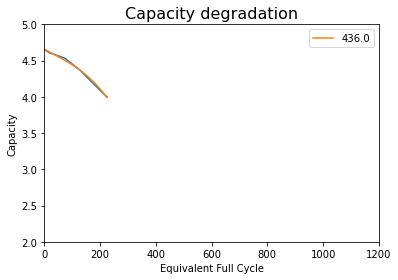

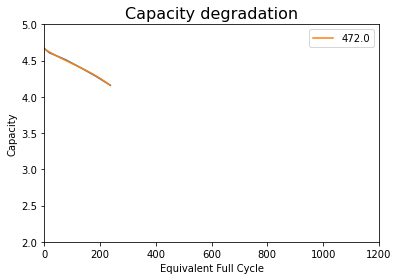

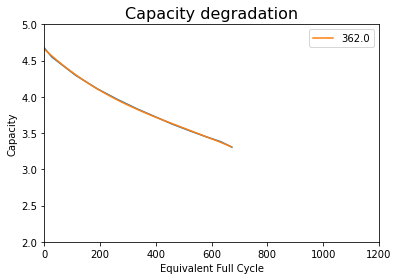

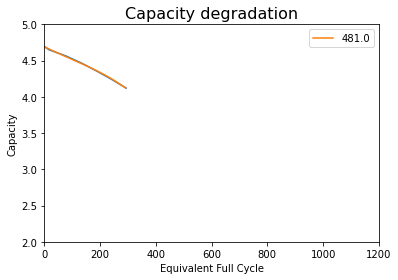

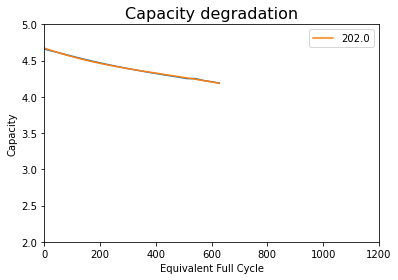

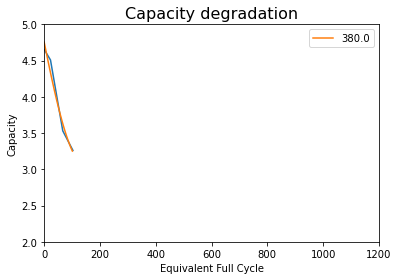

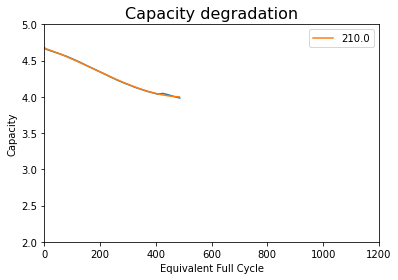

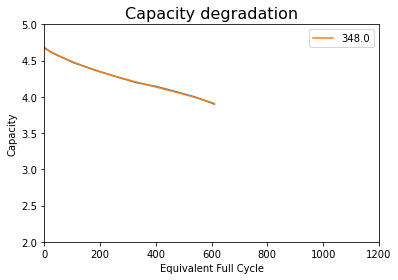

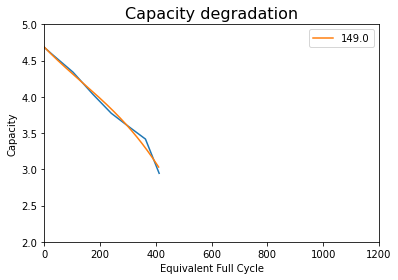

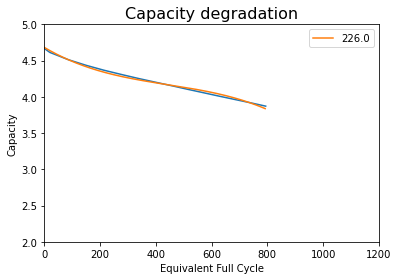

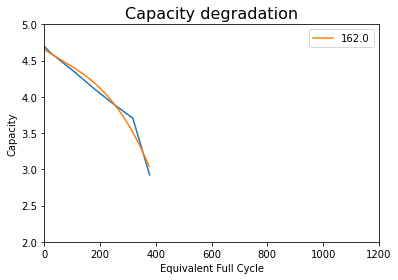

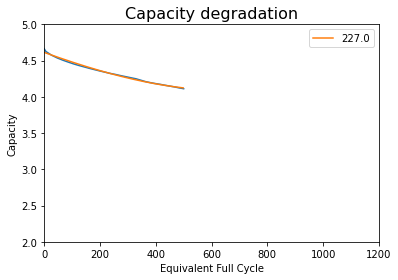

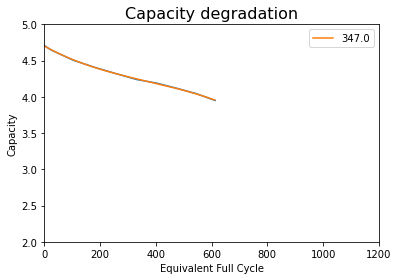

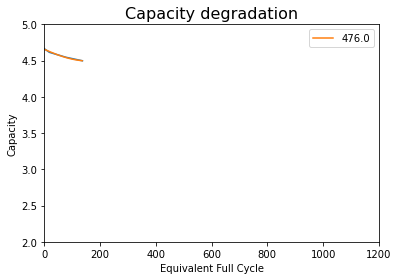

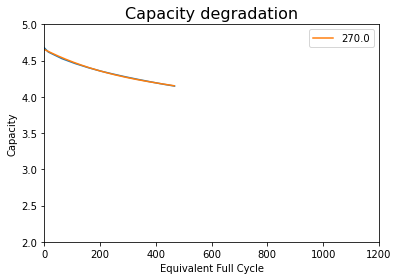

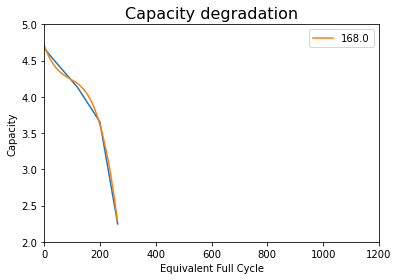

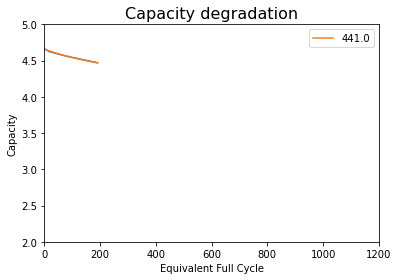

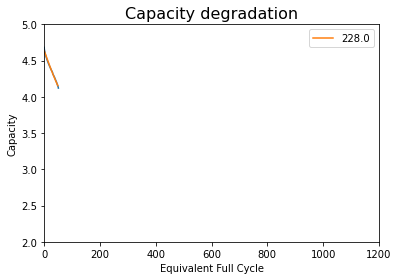

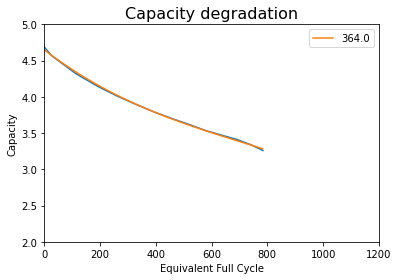

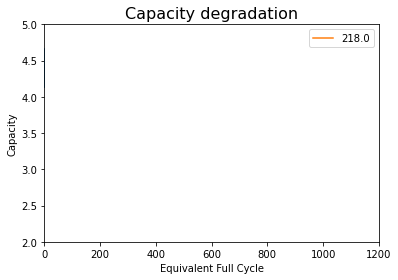

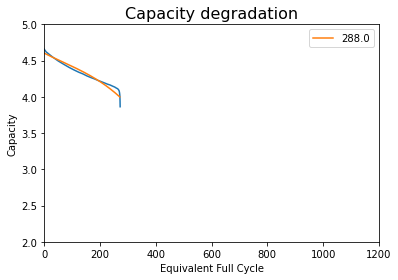

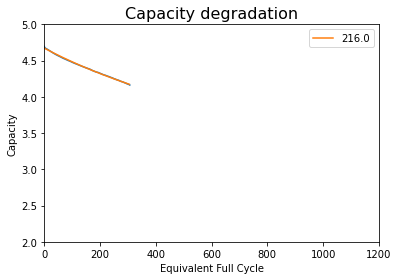

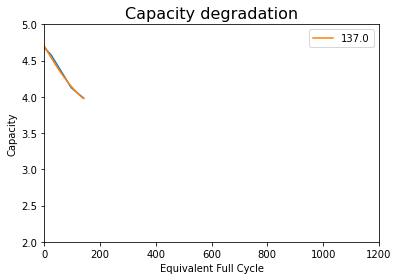

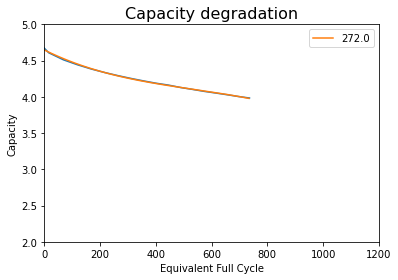

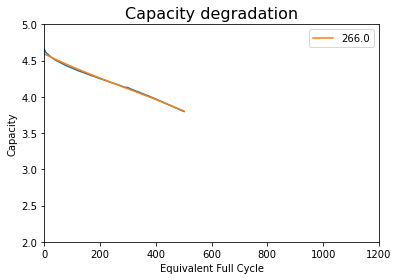

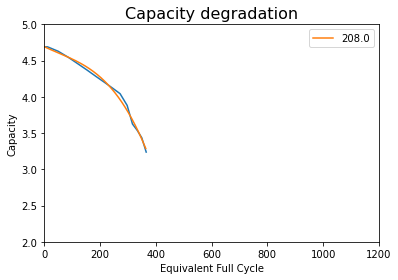

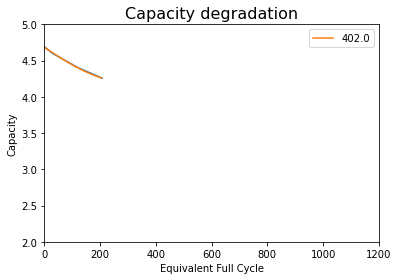

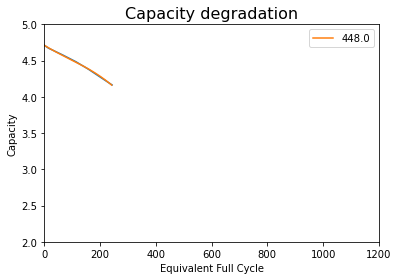

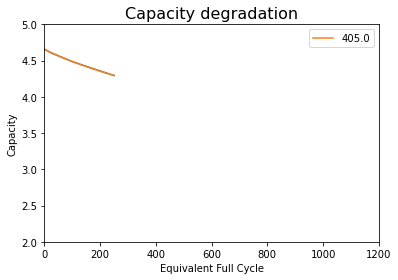

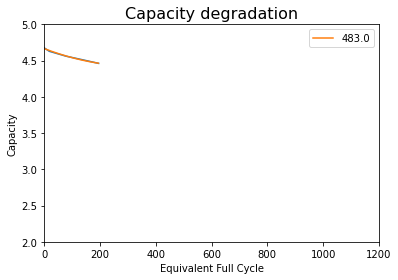

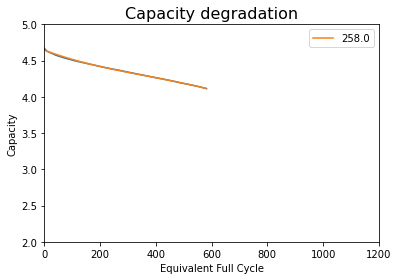

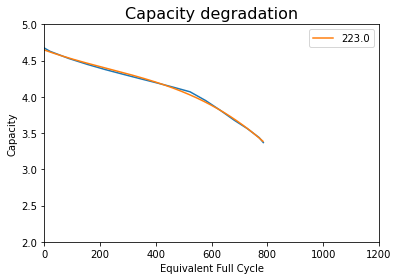

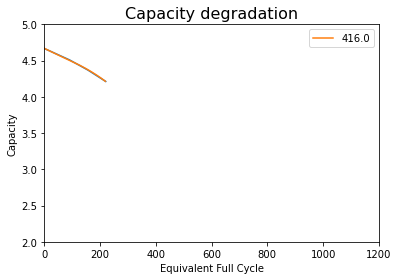

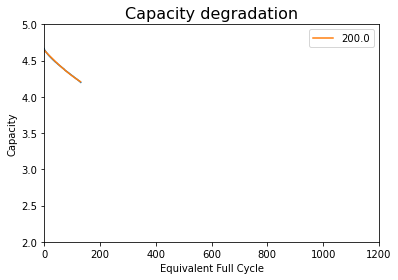

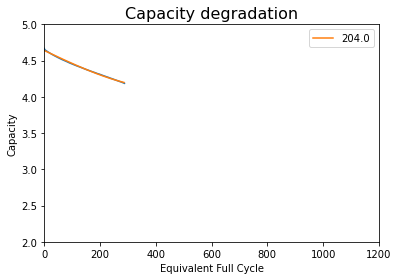

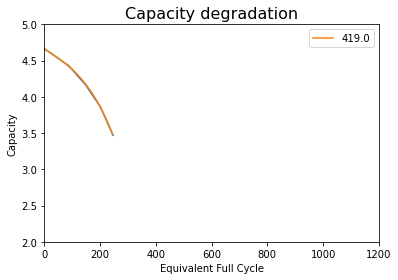

In [401]:
#true curve
for key in test_key:
    inputk = np.array([key])
    plt.figure(key)
    plot_empirical_selected(inputk,l,d,all_metrics_df)
    plot_curve_pred(y_with_key,inputk,l,w,all_metrics_df,objective)
